# Project 4, APS1070 Fall 2020
#### **Linear Regression -  20 points**
**Deadline: Nov 29, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Hanzhe Fan
*   Your **student number**: 1002522834



## Part 1 - Getting Started [1 mark]

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [113]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Print the dataframe.
2. Prepare your dataset as follows: **[1]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.


In [114]:
# Part 1.
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
print(df)
 
feature_data = df[df.columns[0:40]]
target_data = df['Goal']
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=1) #split data into train and validation
 
X_train_scaled = scaler.fit_transform(X_train) #standarize training data
X_test_scaled = scaler.transform(X_test)
X_train_scaled = np.insert(X_train_scaled, 0, values=1, axis=1) # add 1s of first column
X_test_scaled = np.insert(X_test_scaled, 0, values=1, axis=1)


       inputs ClimbRate  Sgz     P     Q  ...  DiffSeTime14  Alpha     Se    Goal
0                   -17   -6 -0.03  0.14  ...           0.0    0.6  0.021 -0.0008
1                  -791   15 -0.28 -0.34  ...           0.0    0.4  0.013 -0.0009
2                   -46   48 -0.42  0.07  ...           0.0    0.5  0.019 -0.0005
3                   496   -5 -0.21 -0.04  ...           0.0    0.5  0.017 -0.0005
4                  -124   16 -0.02  0.05  ...           0.0    0.5  0.018 -0.0006
...                 ...  ...   ...   ...  ...           ...    ...    ...     ...
13745               -53  -13 -0.07  0.02  ...           0.0    0.5  0.019 -0.0007
13746                 1    4 -0.11 -0.07  ...           0.0    0.5  0.016 -0.0004
13747               425  -14  0.40  0.07  ...           0.0    0.9  0.032 -0.0015
13748               102  -10 -0.19  0.08  ...           0.0    1.4  0.051 -0.0015
13749              -165   52  0.08  0.42  ...           0.0    0.9  0.034 -0.0018

[13750 rows x 4

In [115]:
X_train_scaled

array([[ 1.00000000e+00,  1.43231052e+00, -1.17826096e+00, ...,
         1.10103050e-02, -1.21629085e-01, -2.76872628e-03],
       [ 1.00000000e+00, -1.16822225e+00,  3.70836276e-01, ...,
         1.10103050e-02, -1.21629085e-01, -2.90089378e-01],
       [ 1.00000000e+00, -8.31682711e-01, -1.56553527e+00, ...,
         1.10103050e-02,  2.92949961e+00,  2.87043779e+00],
       ...,
       [ 1.00000000e+00,  1.05273947e-01,  1.76502379e+00, ...,
         1.10103050e-02,  3.86892364e-01,  4.28212251e-01],
       [ 1.00000000e+00,  1.48585090e+00,  9.13020309e-01, ...,
         1.10103050e-02, -6.30150534e-01, -7.21070355e-01],
       [ 1.00000000e+00, -5.94575312e-01, -2.10075189e-01, ...,
         1.10103050e-02, -6.30150534e-01, -5.77410030e-01]])

In [116]:
X_test_scaled

array([[ 1.        ,  0.67892088,  1.06793003, ...,  0.0110103 ,
        -0.12162908, -0.14642905],
       [ 1.        ,  0.05555788, -0.63607693, ...,  0.0110103 ,
        -0.63015053, -0.57741003],
       [ 1.        ,  0.10144963, -0.01643803, ...,  0.0110103 ,
         1.40393526,  1.29017421],
       ...,
       [ 1.        ,  0.51065111, -1.44935298, ...,  0.0110103 ,
        -0.63015053, -0.72107036],
       [ 1.        , -1.61949117, -1.17826096, ...,  0.0110103 ,
        -0.12162908, -0.29008938],
       [ 1.        ,  0.56801581,  1.18411233, ...,  0.0110103 ,
        -0.63015053, -0.57741003]])

## Part 2 - Linear Regression - Direct Solution [2 marks]

Implement the direct solution to linear regression on the training set. **[1]**

Report the root-mean-square error (RMSE) for both the training and validation sets.**[1]**

In [117]:
# Part 2.

from sklearn.metrics import mean_squared_error
from scipy.linalg import inv


W = np.dot(inv(np.dot(X_train_scaled.T, X_train_scaled)), np.dot(X_train_scaled.T, y_train)) #analytical solution
X_train_scaled_pred = np.dot(X_train_scaled, W) #predict the new value
X_train_scaled_rmse = np.sqrt(mean_squared_error(X_train_scaled_pred, y_train)) #get rmse value

X_test_scaled_pred = np.dot(X_test_scaled, W)
X_test_scaled_rmse = np.sqrt(mean_squared_error(X_test_scaled_pred, y_test))

print('RMSE for training set: ', X_train_scaled_rmse)
print('RMSE for validation set: ', X_test_scaled_rmse)


RMSE for training set:  0.0001983241902503662
RMSE for validation set:  0.0001874084898605524


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a full batch gradient descent algorithm and record the training time for our model.

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's validation RMSE converges. Here we will consider it converged once validation RMSE is within 0.1% of the Direct Solution RMSE (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value **Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$)** and will use this value in the next parts too.

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.**[0.5]**

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). **[0.5]**

2. Comment on overfitting/underfitting - is running the algorithm too long a concern here? **[1]**

--- Total Training Time: 5.885470390319824 (s) ---


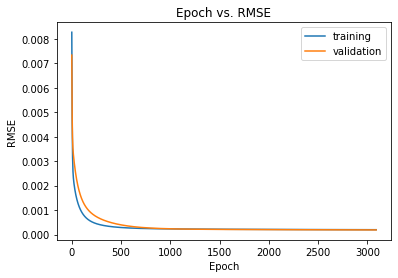

In [118]:
# Part 3 
# (1).

import time
import math
import random
import matplotlib.pyplot as plt

start_time = time.time() ## Records current time

w = (np.random.random(41)).reshape(1,-1)/1000 # set random bias term
lr = 0.01 # learning rate
rmse_array_train= []
rmse_array_test= []

# loop for update bias term and rmse value for training and validation term
while True:
  X_train_scaled_new = np.dot(X_train_scaled,w.T).reshape (-1,)
  X_train_scaled_new_rmse = np.sqrt(mean_squared_error(X_train_scaled_new, y_train))
  rmse_array_train.append(X_train_scaled_new_rmse)
  gradient= (1/len(X_train_scaled_new) * np.dot(X_train_scaled.T, X_train_scaled_new-y_train)).reshape(1,-1)
  w = w - lr * gradient #update bias term

  X_test_scaled_new = np.dot(X_test_scaled,w.T).reshape (-1,)
  X_test_scaled_new_rmse = np.sqrt(mean_squared_error(X_test_scaled_new, y_test))
  rmse_array_test.append(X_test_scaled_new_rmse)
  if X_test_scaled_new_rmse <= X_test_scaled_rmse * 1.001: # when new rmse is smaller than limit, stop
    break

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))# time used for training

#plot the rmse vs epoch graph
plt.plot(rmse_array_train,label = 'training')
plt.plot(rmse_array_test, label = 'validation')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title('Epoch vs. RMSE')
plt.show()


In [119]:
# (2).

'''
From the plot above, the training rmse is really close to the validation rmse, which means it fits
well. And it should neither be overfitting nor underfitting.

'''

'\nFrom the plot above, the training rmse is really close to the validation rmse, which means it fits\nwell. And it should neither be overfitting nor underfitting.\n\n'

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.**[1]** The inputs of that function are 
  * Training Data
  * Validation Data
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)
  * Maximum Iterations = 20000

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds the array would look like: [2 4 6 8 ...]).
 * For certain batchsizes GD might not converge to a solution. For that reason we have a parameter "Maximum iterations" where we limit the total number of iterations that this function can perform. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (ie all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batchsizes fit better on the hardware and may achieve higher performance.  **[0.5]**
  * Plot training and validation RMSE vs. **epoch** for all the batchsizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  * Plot training and validation RMSE vs. **time** for all the batchsizes in a figure. The X-axis is Time and the Y-axis is RMSE. **[0.5]**
  * Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**
  * Describe your findings, including the main takeawyas from each of your plots. **[1]**

In [120]:
# Part 4.
# (0).

#create variables used for function
w_global = (np.random.random(41)).reshape(1,-1)/1000 # create a global random value for all parts below
def MNBGD(training_feature_data,
          training_target_data,
          validation_feature_data,
          validation_target_data,
          batch_size,
          learning_rate,
          convergence_threshold,
          maximum_iteration):
  
  start_time = time.time()
  rmse_train_mnb = []
  rmse_test_mnb = []
  time_list = []
  iter_num = 0 #initial iteration number
  batch_num = training_feature_data.shape[0] // batch_size # number of batches
  reminder = training_feature_data.shape[0] % batch_size # leftover data
  w_mnb = w_global

  while True and iter_num <= maximum_iteration: # loop for update bias term and rmse value for training and validation term
    for i in range (0, batch_num,1):
      if reminder !=0 and i == batch_num:
        X_train_scaled_mnb = training_feature_data [i*batch_size : i*batch_size + reminder] # define new train and validation data with reminders
        y_train_scaled_mnb = training_target_data [i*batch_size : i*batch_size + reminder]
      else: #define without reminders
        X_train_scaled_mnb = training_feature_data [i*batch_size : i*batch_size + batch_size]
        y_train_scaled_mnb = training_target_data [i*batch_size : i*batch_size + batch_size]

      X_train_scaled_mnb_pred = np.dot(X_train_scaled_mnb,w_mnb.T).reshape (-1,)
      gradient_mnb = (1/len(X_train_scaled_mnb_pred) * np.dot(X_train_scaled_mnb.T, X_train_scaled_mnb_pred-y_train_scaled_mnb))
      w_mnb = w_mnb - learning_rate * gradient_mnb
      iter_num +=1 #update iteration number

    X_train_scaled_all_pred = np.dot(training_feature_data,w_mnb.T).reshape (-1,) #update training rmse based on the mini batch gradient descent
    X_train_scaled_all_rmse = np.sqrt(mean_squared_error(X_train_scaled_all_pred, training_target_data))
    rmse_train_mnb.append(X_train_scaled_all_rmse)

    X_test_scaled_all_pred = np.dot(validation_feature_data,w_mnb.T).reshape (-1,)#update validation rmse based on the mini batch gradient descent
    X_test_scaled_all_rmse = np.sqrt(mean_squared_error(X_test_scaled_all_pred, validation_target_data))
    rmse_test_mnb.append(X_test_scaled_all_rmse)

    time_epoch = time.time() - start_time #time used for iteration
    time_list.append(time_epoch)

    if X_test_scaled_all_rmse <= convergence_threshold:
      break

  return w_mnb, rmse_train_mnb, rmse_test_mnb, time_list, iter_num

In [121]:
# (1).

# learning_rate = 0.01
# maximum_iteration = 20000
# convergence_threshold = 1.001 * X_test_scaled_rmse

batch_size_div = [1,2,4,8,16] # batch sizes chosen for diverge iteration
batch_size_conv = [128,256,512,1024,2048] # batch sizes chosen for converge iteration

train_div_rmse = []
validation_div_rmse = []
time_list_div = []

train_conv_rmse = []
validation_conv_rmse = []
time_list_conv = []

for batch_size in batch_size_div:# iterate with the diverge batch size
  w_div, train_rmse_div, val_rmse_div, time_div, iter_div = MNBGD(X_train_scaled, y_train, X_test_scaled, y_test, batch_size, 0.01, 1.001*X_test_scaled_rmse, 20000)

  train_div_rmse.append(train_rmse_div)
  validation_div_rmse.append(val_rmse_div)
  time_list_div.append(time_div)

for batch_size in batch_size_conv:# iterate with the converge batch size
  w_conv, train_rmse_conv, val_rmse_conv, time_conv, iter_conv = MNBGD(X_train_scaled, y_train, X_test_scaled, y_test, batch_size, 0.01, 1.001*X_test_scaled_rmse, 20000)

  train_conv_rmse.append(train_rmse_conv)
  validation_conv_rmse.append(val_rmse_conv)
  time_list_conv.append(time_conv)




<Figure size 432x288 with 0 Axes>

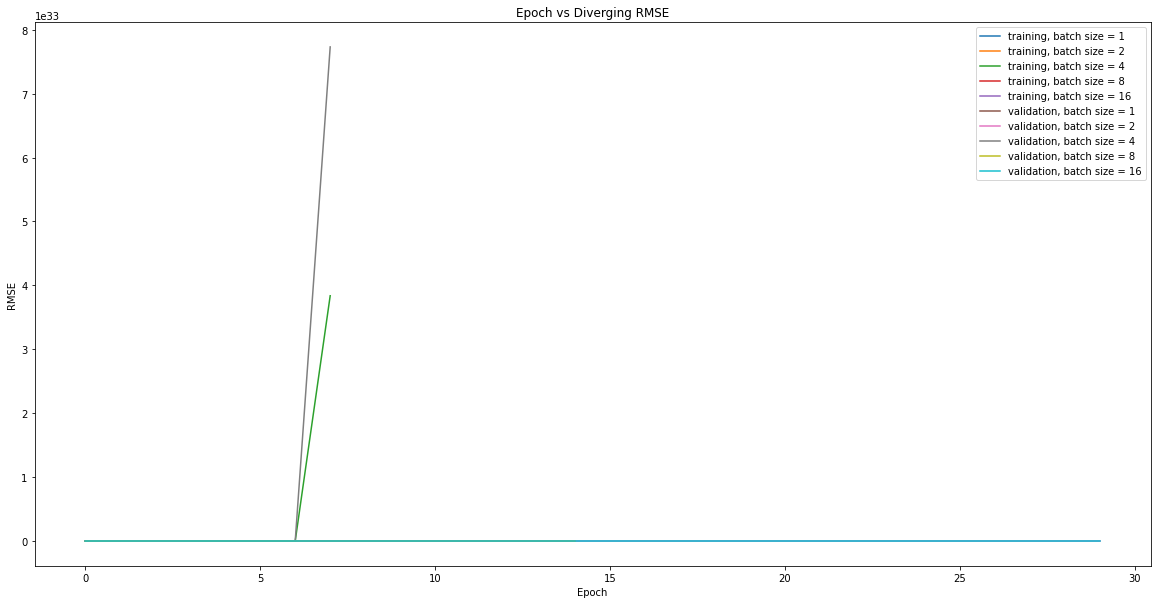

<Figure size 432x288 with 0 Axes>

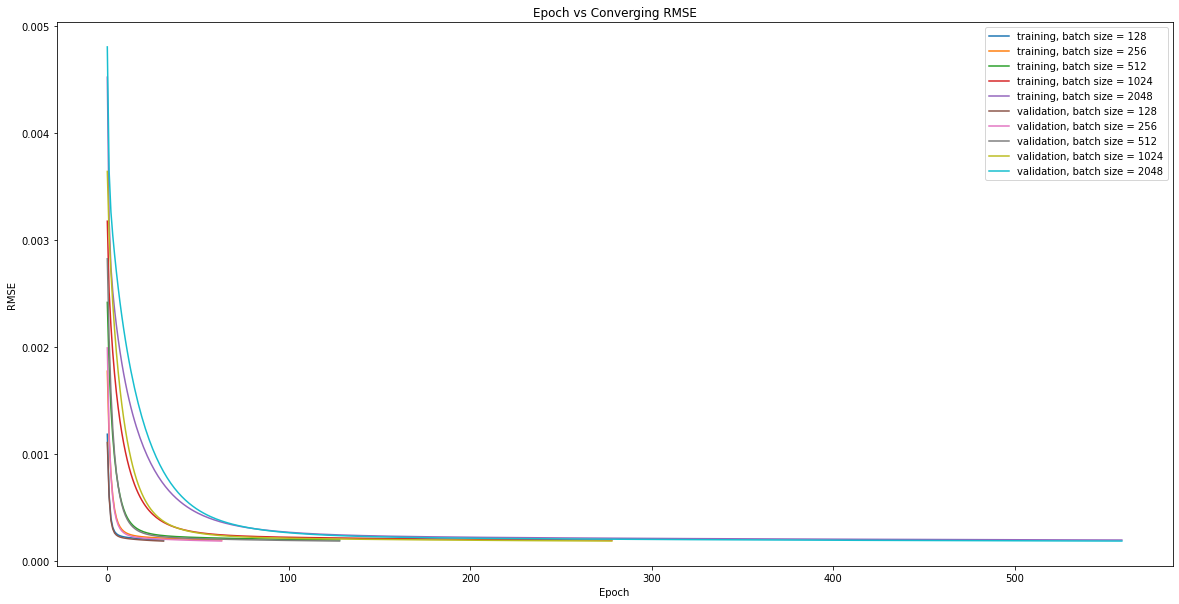

In [122]:
# (2).

plt.figure()
plt.figure(figsize=(20,10))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Epoch vs Diverging RMSE')
# plot epoch vs rmse for diverge batch size
for i, j in enumerate(train_div_rmse):
  plt.plot(j, label='training, batch size = {}'.format(batch_size_div[i]))

for i, j in enumerate(validation_div_rmse):
  plt.plot(j, label='validation, batch size = {}'.format(batch_size_div[i]))
  plt.legend()


plt.figure()
plt.figure(figsize=(20, 10))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Epoch vs Converging RMSE')
# plot for converge batch size
for i, j in enumerate(train_conv_rmse):
  plt.plot(j, label='training, batch size = {}'.format(batch_size_conv[i]))

for i, j in enumerate(validation_conv_rmse):
  plt.plot(j, label='validation, batch size = {}'.format(batch_size_conv[i]))
  plt.legend()


<Figure size 432x288 with 0 Axes>

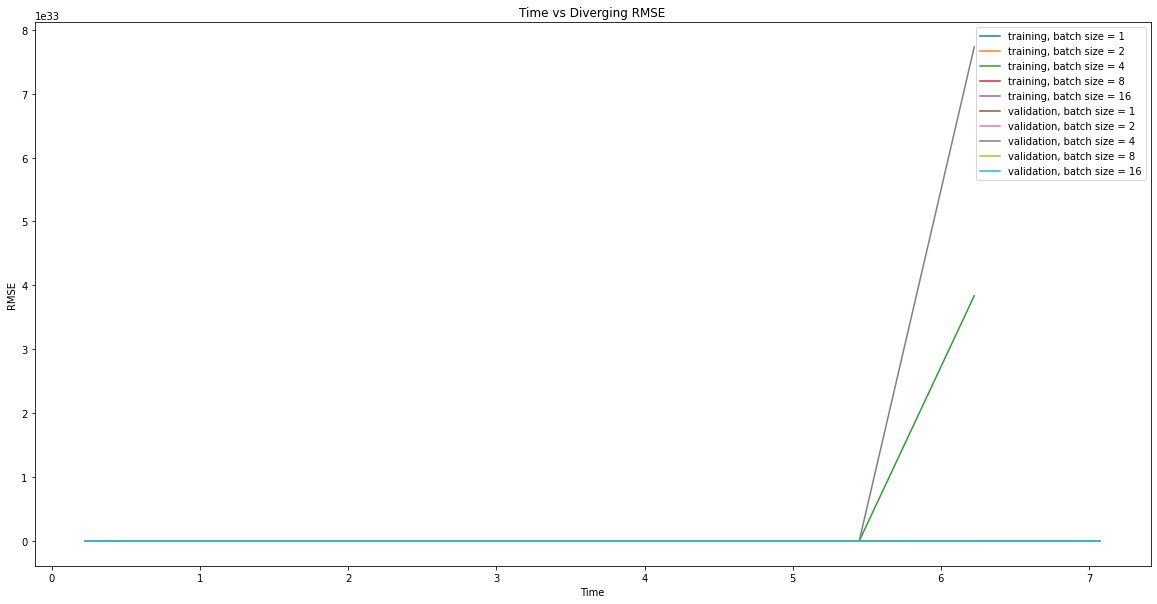

<Figure size 432x288 with 0 Axes>

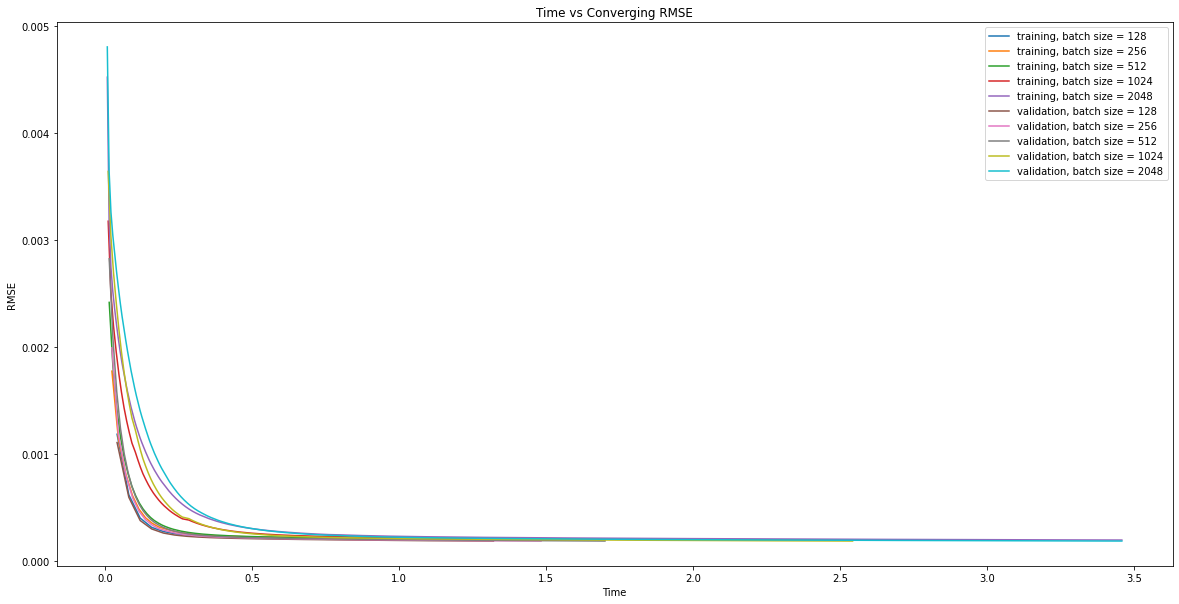

In [123]:
# (3).

plt.figure()
plt.figure(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Time vs Diverging RMSE')
# plot Time vs Diverging RMSE
for i, j in enumerate(train_div_rmse):
  plt.plot(time_list_div[i], j, label='training, batch size = {}'.format(batch_size_div[i]))

for i, j in enumerate(validation_div_rmse):
  plt.plot(time_list_div[i], j, label='validation, batch size = {}'.format(batch_size_div[i]))
  plt.legend()



plt.figure()
plt.figure(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Time vs Converging RMSE')
#Time vs Converging RMSE
for i, j in enumerate(train_conv_rmse):
  plt.plot(time_list_conv[i], j, label='training, batch size = {}'.format(batch_size_conv[i]))

for i, j in enumerate(validation_conv_rmse):
  plt.plot(time_list_conv[i], j, label='validation, batch size = {}'.format(batch_size_conv[i]))
  plt.legend()

Text(0.5, 1.0, 'Total training time vs. Batch size')

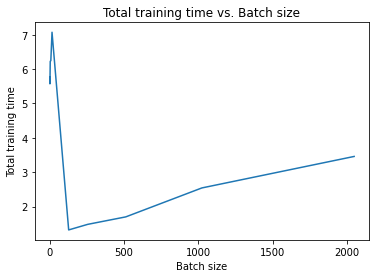

In [124]:
# (4).
# add time with diverge and converge batch size together 
batch_size_all = batch_size_div + batch_size_conv
training_time = []
for i in time_list_div:
  training_time.append(i[-1])
for j in time_list_conv:
  training_time.append(j[-1])

plt.figure()
plt.plot(batch_size_all, training_time)
plt.xlabel('Batch size')
plt.ylabel('Total training time')
plt.title('Total training time vs. Batch size')

In [143]:
# (5).

'''
From the results get above, we can see that with batch size smaller than 64, rmse shows a
diverge trend. And for batch size larger than 64, rmse will converge.
The best batch value is 128
For converge batch size, the number of iterations is larger for smaller batch size than 
larger ones. Also, the time for converging of larger batch size is longer than that of 
smaller ones.
For total time of training, the diverge cases always take more time than converge cases, due 
to the maximum number of iterations, which is 20000.

'''

'\nFrom the results get above, we can see that with batch size smaller than 64, rmse shows a\ndiverge trend. And for batch size larger than 64, rmse will converge.\nThe best batch value is 128\nFor converge batch size, the number of iterations is larger for smaller batch size than \nlarger ones. Also, the time for converging of larger batch size is longer than that of \nsmaller ones.\nFor total time of training, the diverge cases always take more time than converge cases, due \nto the maximum number of iterations, which is 20000.\n\n'

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

Select the best batch size based on the fastest convergence time and sweep the learning rate (at least 10 values) while applying Mini-batch GD. 
  1. Plot the training and validation RMSE vs **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  2. Plot the training and validation RMSE vs **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  3. Describe your findings, including the main takeawyas from each of your plots. **[1]**


<Figure size 432x288 with 0 Axes>

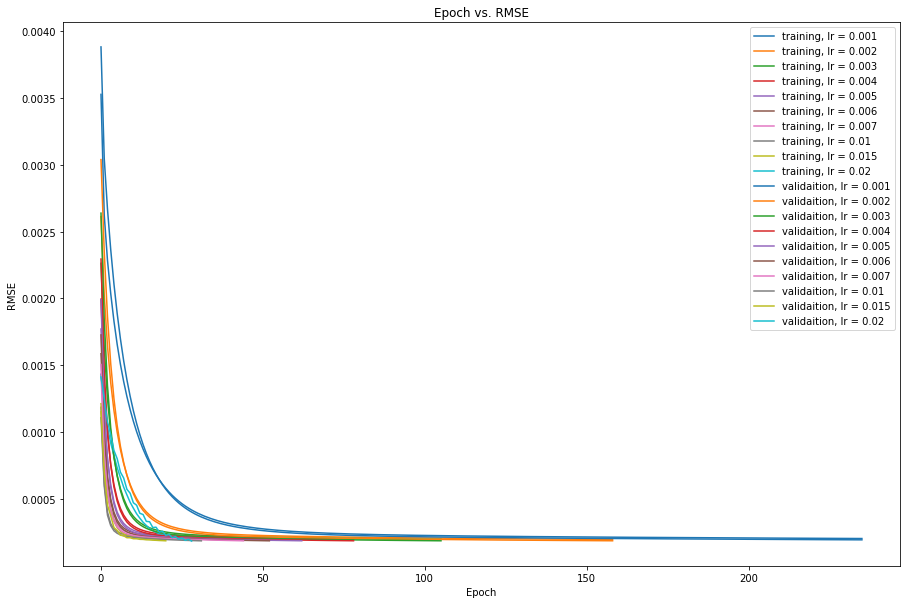

In [126]:
# Part 5.
# (1)

# from results above, best_batch_size = 128, which is derived from part 4

learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.01, 0.015, 0.02]# choose for learning rate

train_lr_rmse = []
validation_lr_rmse = []
time_lr_list = []

for learning_rate in learning_rate_list:
  w_div, training_rmse, validation_rmse, time_lr, iter_lr = MNBGD(X_train_scaled, y_train, X_test_scaled, y_test, 128, learning_rate, 1.001*X_test_scaled_rmse, 20000)

  train_lr_rmse.append(training_rmse)
  validation_lr_rmse.append(validation_rmse)
  time_lr_list.append(time_lr)

plt.figure()
plt.figure(figsize=(15,10))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Epoch vs. RMSE')
#plot for Epoch vs. RMSE
for i, j in enumerate(train_lr_rmse):
  plt.plot(j, label='training, lr = {}'.format(learning_rate_list[i]))

for i, j in enumerate(validation_lr_rmse):
  plt.plot(j, label='validaition, lr = {}'.format(learning_rate_list[i]))
  plt.legend()


<Figure size 432x288 with 0 Axes>

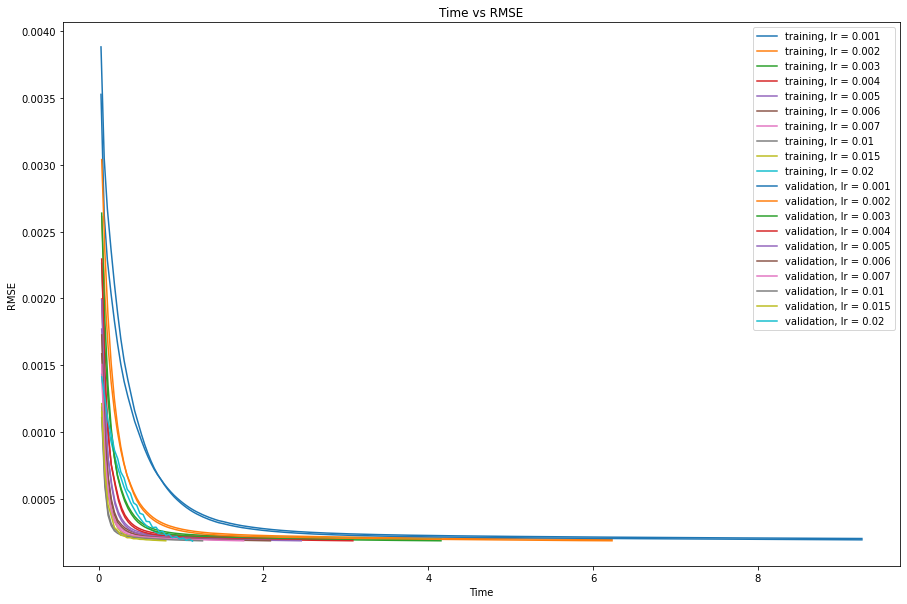

In [127]:
# (2).

plt.figure()
plt.figure(figsize=(15,10))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Time vs RMSE')
#plot for Time vs RMSE
for i, j in enumerate(train_lr_rmse):
  plt.plot(time_lr_list[i], j, label='training, lr = {}'.format(learning_rate_list[i]))

for i, j in enumerate(validation_lr_rmse):
  plt.plot(time_lr_list[i], j, label='validation, lr = {}'.format(learning_rate_list[i]))
  plt.legend()


In [128]:
for i in time_lr_list:
  print(i[-1])
# the minimum training time is 1.038092851638794 sec for learning rate = 0.015

9.262422323226929
6.230590581893921
4.154882192611694
3.085872173309326
2.4598827362060547
2.085566520690918
1.7608387470245361
1.2616147994995117
0.815438985824585
1.1409306526184082


In [129]:
# (3).

'''
From the results get above, learning rate larger than 0.015 has a high possibility to diverge, which isn't show here.
And learning rates smaller than 0.01 converge. Larger learning rates need less epoch to converge, but smaller learning 
rates need more epoch.
Smaller learning rates also need more time to converge, however, larger learning rate reverse.

'''

"\nFrom the results get above, learning rate larger than 0.015 has a high possibility to diverge, which isn't show here.\nAnd learning rates smaller than 0.01 converge. Larger learning rates need less epoch to converge, but smaller learning \nrates need more epoch.\nSmaller learning rates also need more time to converge, however, larger learning rate reverse.\n\n"

## Part 6 - Gradient Descent with Adaptive Learning Rate [4 marks]
Implement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. It's up to you to come up with a way to set **when** and **how much** do you want to change the learning rate. 
Our goal is to find a method for faster convergence. 
  1. Describe **[1]** and implement **[1]** your method.
  2. Plot the training and validation RMSE vs **epoch** for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate). **[1]**
  3. Plot the training and validation RMSE vs **time** for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate). **[1]**

In [130]:
# Part 6.
'''
From the results above, we choose batch size =128 and initial learning rate =0.025.
We first set two values. One is decrease frequencey, how often the learning rate decreases. 
Another is decrease ratio, how much the learning rate decreases. When the iterations condition 
satisfy the pre-set condtion, the learning rate will decrease and continue to iterate until it
it satisfies the next condition. The condition set is that learning rate decrease every 700 iterations
and the new learning rate is 90% of the older learning rate.
'''
def MNBGD_AP(training_feature_data,
          training_target_data,
          validation_feature_data,
          validation_target_data,
          batch_size,
          learning_rate,
          convergence_threshold,
          maximum_iteration,
          decrease_freq,
          decrease_ratio):
  
  start_time = time.time()
  rmse_train_mnb = []
  rmse_test_mnb = []
  time_list = []
  iter_num = 0
  batch_num = training_feature_data.shape[0] // batch_size
  reminder = training_feature_data.shape[0] % batch_size
  w_mnb = w_global

  while True and iter_num <= maximum_iteration:
    for i in range (0, batch_num,1): 
      if iter_num % decrease_freq ==0: # change learning rate every 700 iterations
        learning_rate = learning_rate*decrease_ratio # new learning rate is 80% of the previous one
      if reminder !=0 and i == batch_num:
        X_train_scaled_mnb = training_feature_data [i*batch_size : i*batch_size + reminder]
        y_train_scaled_mnb = training_target_data [i*batch_size : i*batch_size + reminder]
      else:
        X_train_scaled_mnb = training_feature_data [i*batch_size : i*batch_size + batch_size]
        y_train_scaled_mnb = training_target_data [i*batch_size : i*batch_size + batch_size]

      X_train_scaled_mnb_pred = np.dot(X_train_scaled_mnb,w_mnb.T).reshape (-1,)
      gradient_mnb = (1/len(X_train_scaled_mnb_pred) * np.dot(X_train_scaled_mnb.T, X_train_scaled_mnb_pred-y_train_scaled_mnb))
      w_mnb = w_mnb - learning_rate * gradient_mnb
      iter_num +=1

    X_train_scaled_all_pred = np.dot(training_feature_data,w_mnb.T).reshape (-1,)
    X_train_scaled_all_rmse = np.sqrt(mean_squared_error(X_train_scaled_all_pred, training_target_data))
    rmse_train_mnb.append(X_train_scaled_all_rmse)

    X_test_scaled_all_pred = np.dot(validation_feature_data,w_mnb.T).reshape (-1,)
    X_test_scaled_all_rmse = np.sqrt(mean_squared_error(X_test_scaled_all_pred, validation_target_data))
    rmse_test_mnb.append(X_test_scaled_all_rmse)

    time_epoch = time.time() - start_time
    time_list.append(time_epoch)

    if X_test_scaled_all_rmse <= convergence_threshold:
      break

  plt.figure()
  plt.plot(rmse_train_mnb, label = 'training')
  plt.plot(rmse_test_mnb, label = 'validation')
  plt.plot(train_lr_rmse[8], label='training, lr = 0.015')
  plt.plot(validation_lr_rmse[8], label='validation, lr = 0.015')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title('Epoch vs. RMSE')
  plt.legend()

  plt.figure()
  plt.plot(time_list, rmse_train_mnb, label = 'training')
  plt.plot(time_list, rmse_test_mnb, label = 'validation')
  plt.plot(time_lr_list[-2], train_lr_rmse[-2], label='training, lr = 0.015')
  plt.plot(time_lr_list[-2], validation_lr_rmse[-2], label='training, lr = 0.015')

  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.title('Time vs. RMSE')
  plt.legend()
  print('Total training time static is 1.038092851638794')#result from part5
  print('Total training time adaptive is ',time_list[-1])#result of adpative learning

Total training time static is 1.038092851638794
Total training time adaptive is  0.7614421844482422


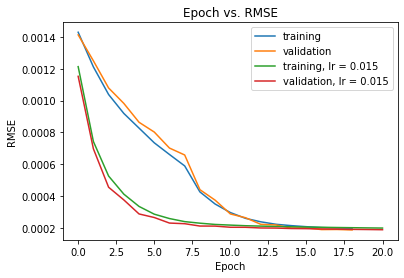

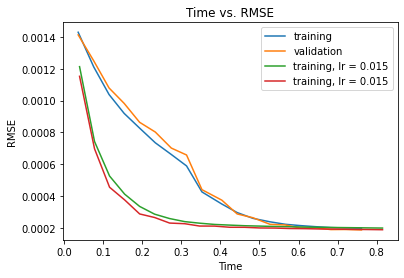

In [144]:
MNBGD_AP(X_train_scaled, y_train, X_test_scaled, y_test, 128, 0.025, 1.001*X_test_scaled_rmse, 20000,700,0.8)

# compared with results from part5 and part6, we can see that adaptive 
# learn rate method has a effective than fixd learning rate

## Part 7 - Gradient Descent with Additional Features and Regularization [3 marks]

Now, we'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation **[0.5]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y). 
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.

2. Linear Regression **[0.5]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features **[0.5]**
  * Let's add more features to our dataset (up to degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization **[0.5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

5. Discuss your results. What do you conclude? **[1]**

In [132]:
# Part 7.

# (1)
import pandas as pd
df2=pd.read_csv("https://www.eecg.utoronto.ca/~hadizade/APS1070/LR_data.csv" , skipinitialspace=True)
print(df2)

X = df2[df2.columns[0:10]].to_numpy()
y = df2[df2.columns[-1]].to_numpy()

X_training, X_validation, y_training, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

           x1        x2        x3  ...        x9       x10             y
0    1.454481  4.940543  7.116015  ...  3.841250  6.121133  6.575066e+06
1    4.907182  1.653654  7.339445  ...  8.646473  3.806860  8.419881e+06
2    1.842804  1.183878  4.203206  ...  3.260723  5.463808  9.745537e+04
3    2.393457  0.094127  3.208929  ...  7.312995  5.475240  1.129200e+04
4    5.093724  3.905293  4.858562  ...  9.128607  0.790795  3.105448e+05
..        ...       ...       ...  ...       ...       ...           ...
195  2.936450  2.094812  9.493814  ...  7.622569  3.037162  6.599726e+07
196  4.915597  1.953974  7.312552  ...  7.043560  5.745565  8.176250e+06
197  6.772096  6.406489  4.638352  ...  9.386478  4.147710  2.144147e+05
198  3.940339  4.330498  6.693371  ...  7.883720  8.525164  4.028735e+06
199  8.636129  1.272939  4.339175  ...  9.543772  5.673870  1.257168e+05

[200 rows x 11 columns]


In [133]:
# (2).
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)# standardize data
X_validation_scaled = scaler.transform(X_validation)

linear_regressor = LinearRegression()#use linear regression method
linear_regressor.fit(X_training_scaled, y_training)
y_pred_training = linear_regressor.predict(X_training_scaled) 
y_pred_validation= linear_regressor.predict(X_validation_scaled)

y_training_rmse = np.sqrt(mean_squared_error(y_pred_training, y_training))# calculate rmse
y_validation_rmse = np.sqrt(mean_squared_error(y_pred_validation, y_validation))

print('RMSE for training set = ', y_training_rmse)
print('RMSE for validation set = ', y_validation_rmse)

RMSE for training set =  16296980.655667372
RMSE for validation set =  14061578.864980105


In [134]:
# (3).
from sklearn.preprocessing import PolynomialFeatures
scaler = StandardScaler()

poly = PolynomialFeatures(8)# add more features with degree of 8
X_addfeat_train = poly.fit_transform(X_training)
X_addfeat_test = poly.fit_transform(X_validation)

X_addfeat_train_scaled = scaler.fit_transform(X_addfeat_train)# standarize data
X_addfeat_validation_scaled = scaler.transform(X_addfeat_test)

linear_regressor = LinearRegression()# use linear regression
linear_regressor.fit(X_addfeat_train_scaled, y_training)
y_addfeat_pred_training = linear_regressor.predict(X_addfeat_train_scaled) 
y_addfeat_pred_validation= linear_regressor.predict(X_addfeat_validation_scaled)

y_addfeat_training_rmse = np.sqrt(mean_squared_error(y_addfeat_pred_training, y_training))# calculate rmse
y_addfeat_validation_rmse = np.sqrt(mean_squared_error(y_addfeat_pred_validation, y_validation))

print('RMSE for training set = ', y_addfeat_training_rmse)
print('RMSE for validation set = ', y_addfeat_validation_rmse)

RMSE for training set =  1.1154878119198678e-07
RMSE for validation set =  10920908.905406754


In [135]:
# (4).
from sklearn.linear_model import Ridge

a_range = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000,1000000, 10000000,100000000, 1000000000, 10000000000]
for i in a_range:
  clf = Ridge(alpha= i)
  clf.fit(X_addfeat_train_scaled, y_training)

  y_addfeat_pred_training_clf = clf.predict(X_addfeat_train_scaled)
  y_addfeat_pred_validation_clf= clf.predict(X_addfeat_validation_scaled)

  y_addfeat_training_clf_rmse = np.sqrt(mean_squared_error(y_addfeat_pred_training_clf, y_training))
  y_addfeat_validation_clf_rmse = np.sqrt(mean_squared_error(y_addfeat_pred_validation_clf, y_validation))

  print('RMSE for training set for alpha = ', i, 'is', y_addfeat_training_clf_rmse)
  print('RMSE for validation set for alpha = ', i, 'is', y_addfeat_validation_clf_rmse,'\n')

RMSE for training set for alpha =  0.01 is 321.01240916309644
RMSE for validation set for alpha =  0.01 is 10919504.125893764 

RMSE for training set for alpha =  0.1 is 3199.3496468416506
RMSE for validation set for alpha =  0.1 is 10916171.329033064 

RMSE for training set for alpha =  1 is 30988.518341657847
RMSE for validation set for alpha =  1 is 10884651.018827904 

RMSE for training set for alpha =  10 is 248080.3696494477
RMSE for validation set for alpha =  10 is 10659707.103878867 

RMSE for training set for alpha =  100 is 1196923.6228686073
RMSE for validation set for alpha =  100 is 9484394.22011948 

RMSE for training set for alpha =  1000 is 3609078.2596920887
RMSE for validation set for alpha =  1000 is 5633182.875138311 

RMSE for training set for alpha =  10000 is 7712389.432217537
RMSE for validation set for alpha =  10000 is 4521905.583502402 

RMSE for training set for alpha =  100000 is 14600498.520348776
RMSE for validation set for alpha =  100000 is 10502863.77

In [136]:
# (5).

'''
From the results above, we can see that, the rmse for both training and 
validation set are extremely large, which means the model for the data is 
underfitted of the real data. When adding additional features, rmse for
training set is small, but rmse for validation set is still extremely large,
which means the model for the data is overfitted of the real data. And with
increasing in alpha value, the rmse for both training and validation set increase.

'''

'\nFrom the results above, we can see that, the rmse for both training and \nvalidation set are extremely large, which means the model for the data is \nunderfitted of the real data. When adding additional features, rmse for\ntraining set is small, but rmse for validation set is still extremely large,\nwhich means the model for the data is overfitted of the real data. And with\nincreasing in alpha value, the rmse for both training and validation set increase.\n\n'

## Part 8 - Linear Regression with a Custom Dataset [2 marks]


Find a dataset online and train and validate a linear regression model with the techniques you learned in this Project.

*   Introduce your dataset.**[0.5]**
*   Explain your approach. **[0.5]**
*   Summarize your results. **[1]**

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.






In [137]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict (1).csv


In [138]:
# Part 8.
# (1).

'''
The dataset is about the change of admission. There are 7 features including 'GRE score', 'TOEFL Score',
'University rating', 'SOP', 'LOR', 'CGPA' and 'research'
'''
scaler = StandardScaler()
df3 = pd.read_csv("Admission_Predict.csv" , skipinitialspace=True)

df3

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [139]:
# (2).

feature_data_ad = df3[df3.columns[0:7]]
target_data_ad = df3[df3.columns[-1]]
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(feature_data_ad, target_data_ad, test_size=0.2, random_state=1) #split data into train and validation
 
X_train_ad_scaled = scaler.fit_transform(X_train_ad) #standarize training data
X_test_ad_scaled = scaler.transform(X_test_ad)

W_ad = np.dot(inv(np.dot(X_train_ad_scaled.T, X_train_ad_scaled)), np.dot(X_train_ad_scaled.T, y_train_ad)) #analytical solution
X_train_ad_scaled_pred = np.dot(X_train_ad_scaled, W_ad) #predict the new value
X_train_ad_scaled_rmse = np.sqrt(mean_squared_error(X_train_ad_scaled_pred, y_train_ad)) #get rmse value

X_test_ad_scaled_pred = np.dot(X_test_ad_scaled, W_ad)
X_test_ad_scaled_rmse = np.sqrt(mean_squared_error(X_test_ad_scaled_pred, y_test_ad))

print('RMSE for training set: ', X_train_ad_scaled_rmse)
print('RMSE for validation set: ', X_test_ad_scaled_rmse)

RMSE for training set:  0.7288020767247945
RMSE for validation set:  0.7177278655527827


In [140]:
# (2).

'''
2 methods for rmse calcualtion: Direction solution and Adaptive learning 
rate are used in Part 8.
'''
def MNBGD_AD(training_feature_data,
          training_target_data,
          validation_feature_data,
          validation_target_data,
          batch_size,
          learning_rate,
          convergence_threshold,
          maximum_iteration,
          decrease_freq,
          decrease_ratio):
  start_time = time.time()
  rmse_train_mnb = []
  rmse_test_mnb = []
  time_list = []
  iter_num = 0
  batch_num = training_feature_data.shape[0] // batch_size
  reminder = training_feature_data.shape[0] % batch_size
  w_mnb = (np.random.random(7)).reshape(1,-1)/1000

  while True and iter_num <= maximum_iteration:
    for i in range (0, batch_num,1): 
      if iter_num % decrease_freq ==0: # change learning rate every 700 iterations
        learning_rate = learning_rate*decrease_ratio # new learning rate is 90% of the previous one
      if reminder !=0 and i == batch_num:
        X_train_scaled_mnb = training_feature_data [i*batch_size : i*batch_size + reminder]
        y_train_scaled_mnb = training_target_data [i*batch_size : i*batch_size + reminder]
      else:
        X_train_scaled_mnb = training_feature_data [i*batch_size : i*batch_size + batch_size]
        y_train_scaled_mnb = training_target_data [i*batch_size : i*batch_size + batch_size]

      X_train_scaled_mnb_pred = np.dot(X_train_scaled_mnb,w_mnb.T).reshape (-1,)
      gradient_mnb = (1/len(X_train_scaled_mnb_pred) * np.dot(X_train_scaled_mnb.T, X_train_scaled_mnb_pred-y_train_scaled_mnb))
      w_mnb = w_mnb - learning_rate * gradient_mnb
      iter_num +=1

    X_train_scaled_all_pred = np.dot(training_feature_data,w_mnb.T).reshape (-1,)
    X_train_scaled_all_rmse = np.sqrt(mean_squared_error(X_train_scaled_all_pred, training_target_data))
    rmse_train_mnb.append(X_train_scaled_all_rmse)

    X_test_scaled_all_pred = np.dot(validation_feature_data,w_mnb.T).reshape (-1,)
    X_test_scaled_all_rmse = np.sqrt(mean_squared_error(X_test_scaled_all_pred, validation_target_data))
    rmse_test_mnb.append(X_test_scaled_all_rmse)

    time_epoch = time.time() - start_time
    time_list.append(time_epoch)

    if X_test_scaled_all_rmse <= convergence_threshold:
      break
  plt.figure()
  plt.plot(rmse_train_mnb, label = 'training')
  plt.plot(rmse_test_mnb, label = 'validation')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title('Epoch vs. RMSE')
  plt.legend()

  plt.figure()
  plt.plot(time_list, rmse_train_mnb, label = 'training')
  plt.plot(time_list, rmse_test_mnb, label = 'validation')
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.title('Time vs. RMSE')
  plt.legend()



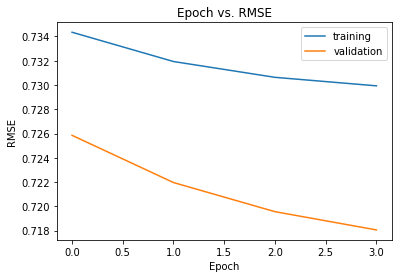

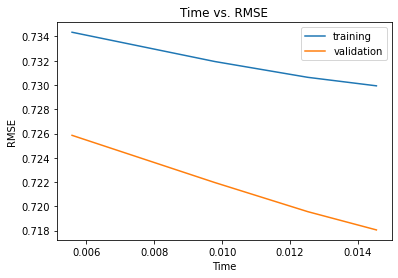

In [141]:
MNBGD_AD(X_train_ad_scaled, y_train_ad, X_test_ad_scaled, y_test_ad, 64, 0.015, 1.001*X_test_ad_scaled_rmse, 20000,50,0.8)

In [142]:
# (3).

'''
From the results above, we can see that values for both training and validation set stay at a low value
around 0.71 to 0.73. And it seems to converge later. Although rmse of training is higher than validation set, the model 
fits well rather than overfitting nor underfitting.

'''

'\nFrom the results above, we can see that values for both training and validation set stay at a low value\naround 0.71 to 0.73. And it seems to converge later. Although rmse of training is higher than validation set, the model \nfits well rather than overfitting nor underfitting.\n\n'